In [1]:
import pandas as pd
pd.set_option("display.max_columns",101)

In [2]:
data = pd.read_csv("train_dataset.csv")

In [3]:
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7135,1654,CL,D-penicillamine,19581,F,N,N,Y,N,0.3,279.0,2.96,84.0,1500.8,99.43,109.0,293.0,10.2,4.0
1,7326,41,C,D-penicillamine,22880,F,NaN,N,NaN,N,0.3,NaN,2.96,NaN,1835.4,26.35,131.0,308.0,10.8,1.0
2,7254,297,D,NaN,27957,F,N,N,NaN,N,0.3,328.0,2.64,4.0,NaN,NaN,116.0,194.0,10.3,3.0
3,3135,1872,C,D-penicillamine,21111,F,NaN,Y,Y,N,0.3,302.0,2.02,49.0,NaN,26.35,NaN,NaN,10.5,4.0
4,2483,939,CL,D-penicillamine,18061,F,NaN,NaN,NaN,N,0.5,344.0,3.11,91.0,NaN,104.56,NaN,306.0,11.4,2.0


In [4]:
data['Age'] = data['Age']//365

In [5]:
data.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [6]:
data.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,6800.000000,6800.000000,6800.000000,6800.000000,3699.000000,6800.000000,4644.000000,4302.000000,4698.000000,3988.000000,6462.000000,6645.000000,6800.000000
mean,6268.608088,1664.055441,62.143971,1.806147,294.575831,3.036118,68.569121,1802.951464,79.554427,133.857823,293.306097,11.231031,3.157206
std,2405.527133,1332.308135,12.800896,3.218009,128.085317,0.528164,59.637733,1618.550339,43.433832,47.291444,115.146088,1.123444,0.993059
min,1239.000000,41.000000,26.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,4353.750000,537.000000,53.000000,0.300000,204.000000,2.680000,26.000000,1122.650000,35.290000,114.000000,213.000000,10.500000,2.000000
50%,6599.500000,1443.000000,64.000000,0.400000,312.000000,3.020000,68.000000,1563.150000,88.505000,128.000000,285.000000,11.100000,4.000000
75%,8299.250000,2519.000000,74.000000,1.800000,353.000000,3.390000,91.000000,2013.250000,110.672500,141.000000,365.000000,11.700000,4.000000
max,9999.000000,4795.000000,78.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,340.480000,498.000000,563.000000,18.000000,4.000000


**Check for null values**

In [7]:
for x in data.columns:
  print("% of NAN in {} = {}".format(x,100*(data[x].isna().sum()/6800)))

% of NAN in ID = 0.0
% of NAN in N_Days = 0.0
% of NAN in Status = 0.0
% of NAN in Drug = 29.77941176470588
% of NAN in Age = 0.0
% of NAN in Sex = 0.0
% of NAN in Ascites = 33.029411764705884
% of NAN in Hepatomegaly = 35.69117647058824
% of NAN in Spiders = 38.088235294117645
% of NAN in Edema = 0.0
% of NAN in Bilirubin = 0.0
% of NAN in Cholesterol = 45.602941176470594
% of NAN in Albumin = 0.0
% of NAN in Copper = 31.705882352941178
% of NAN in Alk_Phos = 36.73529411764706
% of NAN in SGOT = 30.911764705882355
% of NAN in Tryglicerides = 41.35294117647059
% of NAN in Platelets = 4.970588235294118
% of NAN in Prothrombin = 2.2794117647058822
% of NAN in Stage = 0.0


In [8]:
data.isnull().sum()

ID                  0
N_Days              0
Status              0
Drug             2025
Age                 0
Sex                 0
Ascites          2246
Hepatomegaly     2427
Spiders          2590
Edema               0
Bilirubin           0
Cholesterol      3101
Albumin             0
Copper           2156
Alk_Phos         2498
SGOT             2102
Tryglicerides    2812
Platelets         338
Prothrombin       155
Stage               0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6800 entries, 0 to 6799
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             6800 non-null   int64  
 1   N_Days         6800 non-null   int64  
 2   Status         6800 non-null   object 
 3   Drug           4775 non-null   object 
 4   Age            6800 non-null   int64  
 5   Sex            6800 non-null   object 
 6   Ascites        4554 non-null   object 
 7   Hepatomegaly   4373 non-null   object 
 8   Spiders        4210 non-null   object 
 9   Edema          6800 non-null   object 
 10  Bilirubin      6800 non-null   float64
 11  Cholesterol    3699 non-null   float64
 12  Albumin        6800 non-null   float64
 13  Copper         4644 non-null   float64
 14  Alk_Phos       4302 non-null   float64
 15  SGOT           4698 non-null   float64
 16  Tryglicerides  3988 non-null   float64
 17  Platelets      6462 non-null   float64
 18  Prothrom

In [10]:
data.shape

(6800, 20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1df57dc10>,
      dtype=object)

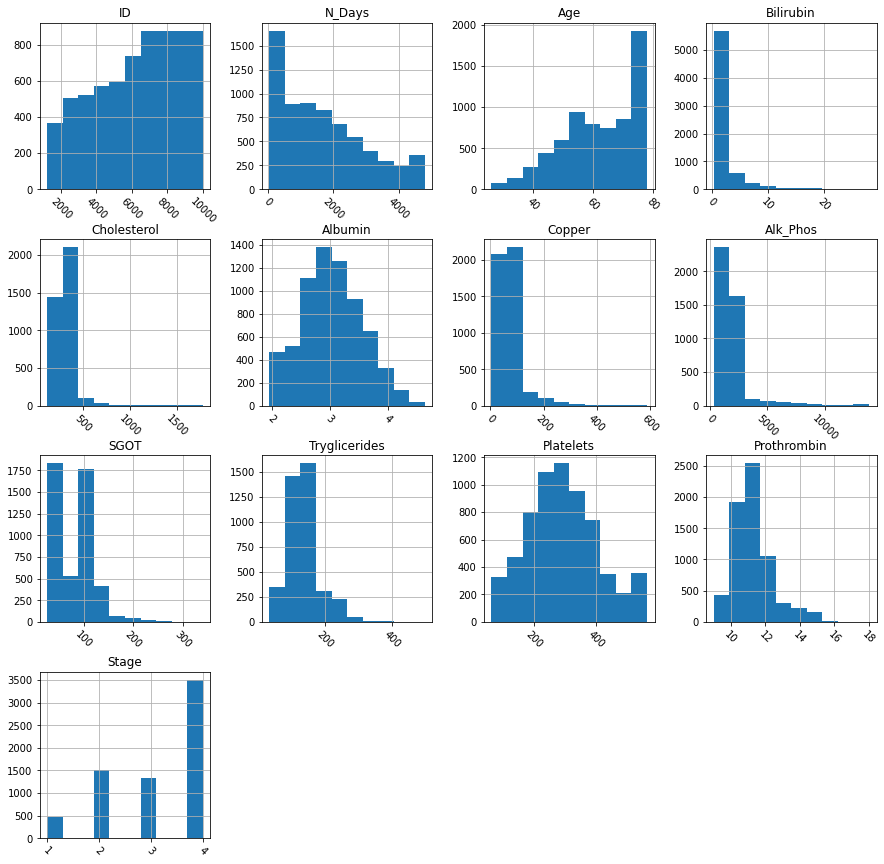

In [11]:
data.hist(figsize=(15,15), xrot=-45, bins=10)

In [12]:
data['Cholesterol'].median()

312.0

In [13]:
round(data['Copper'].mean(),2)

68.57

In [14]:
data['Alk_Phos'].median()

1563.15

In [15]:
round(data['SGOT'].median(),2)

88.5

In [16]:
data['Tryglicerides'].mode()

0    130.0
dtype: float64

In [17]:
data['Platelets'].mode()

0    563.0
dtype: float64

In [18]:
round(data['Prothrombin'].mean(),2)

11.23

Replacing the null values

In [19]:
data["Cholesterol"]=data["Cholesterol"].fillna(312.0)
data["Copper"]=data["Copper"].fillna(68.57)
data["Alk_Phos"]=data["Alk_Phos"].fillna(1563.15)
data["SGOT"]=data["SGOT"].fillna(88.5)
data['Tryglicerides']=data['Tryglicerides'].fillna(130.0)
data['Platelets']=data['Platelets'].fillna(563.0)
data['Prothrombin'] = data['Prothrombin'].fillna(11.23)

In [20]:
data.isnull().sum() #null values are filled

ID                  0
N_Days              0
Status              0
Drug             2025
Age                 0
Sex                 0
Ascites          2246
Hepatomegaly     2427
Spiders          2590
Edema               0
Bilirubin           0
Cholesterol         0
Albumin             0
Copper              0
Alk_Phos            0
SGOT                0
Tryglicerides       0
Platelets           0
Prothrombin         0
Stage               0
dtype: int64

In [21]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


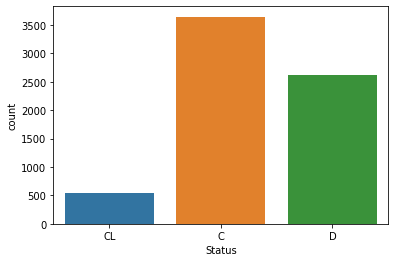

In [22]:
sns.countplot(data['Status'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


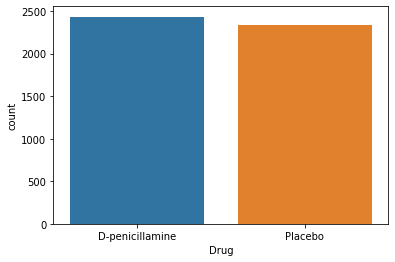

In [23]:
sns.countplot(data['Drug'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


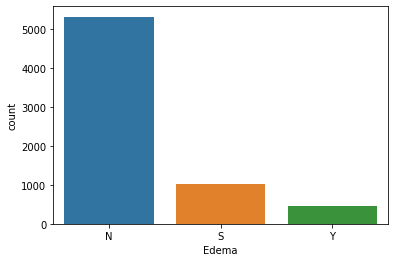

In [24]:
sns.countplot(data['Edema'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


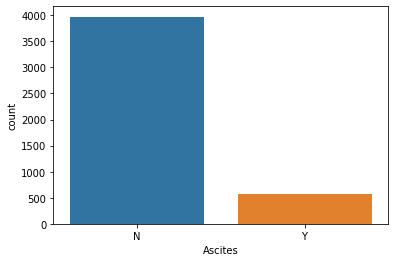

In [25]:
sns.countplot(data['Ascites'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


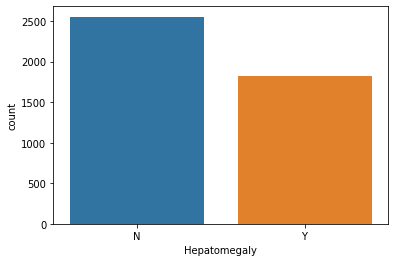

In [26]:
sns.countplot(data['Hepatomegaly'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


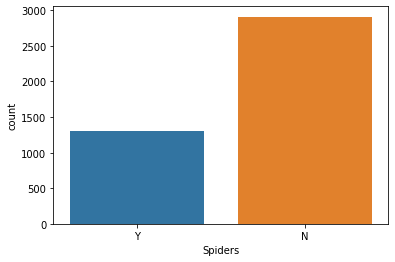

In [27]:
sns.countplot(data['Spiders'])

In [28]:
data["Drug"]=data["Drug"].fillna('D-penicillamine')
data["Ascites"]=data["Ascites"].fillna('N')
data["Hepatomegaly"]=data["Hepatomegaly"].fillna('N')
data["Spiders"]=data["Spiders"].fillna('N')

In [29]:
data.isnull().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [30]:
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7135,1654,CL,D-penicillamine,53,F,N,N,Y,N,0.3,279.0,2.96,84.00,1500.80,99.43,109.0,293.0,10.2,4.0
1,7326,41,C,D-penicillamine,62,F,N,N,N,N,0.3,312.0,2.96,68.57,1835.40,26.35,131.0,308.0,10.8,1.0
2,7254,297,D,D-penicillamine,76,F,N,N,N,N,0.3,328.0,2.64,4.00,1563.15,88.50,116.0,194.0,10.3,3.0
3,3135,1872,C,D-penicillamine,57,F,N,Y,Y,N,0.3,302.0,2.02,49.00,1563.15,26.35,130.0,563.0,10.5,4.0
4,2483,939,CL,D-penicillamine,49,F,N,N,N,N,0.5,344.0,3.11,91.00,1563.15,104.56,130.0,306.0,11.4,2.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


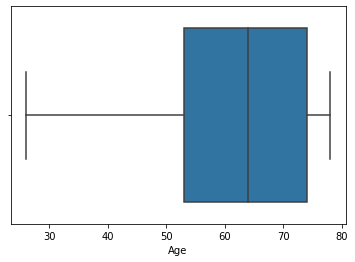

In [31]:
sns.boxplot(data['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


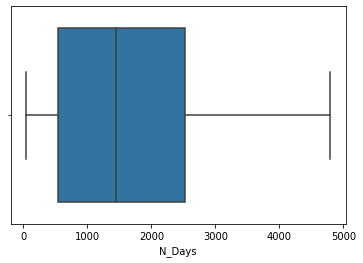

In [32]:
sns.boxplot(data['N_Days'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


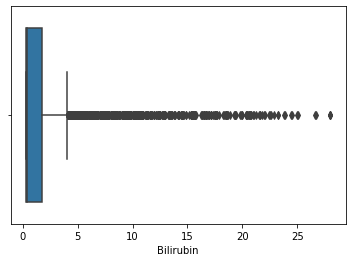

In [33]:
sns.boxplot(data['Bilirubin'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


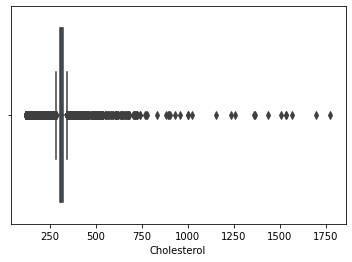

In [34]:
sns.boxplot(data['Cholesterol'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


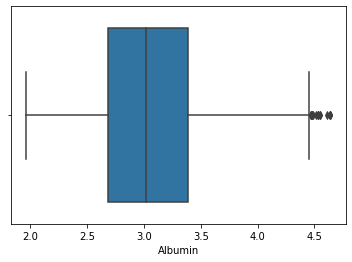

In [35]:
sns.boxplot(data['Albumin'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


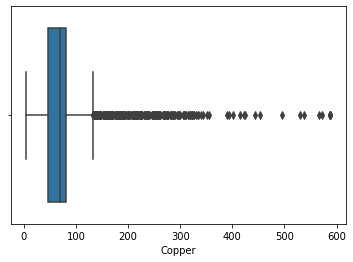

In [36]:
sns.boxplot(data['Copper'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


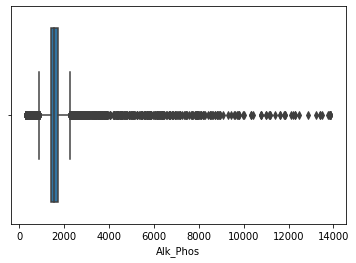

In [37]:
sns.boxplot(data['Alk_Phos'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


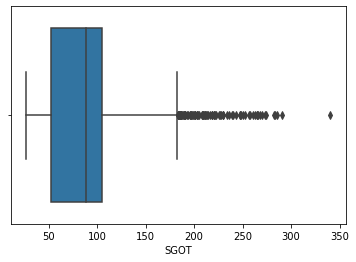

In [38]:
sns.boxplot(data['SGOT'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


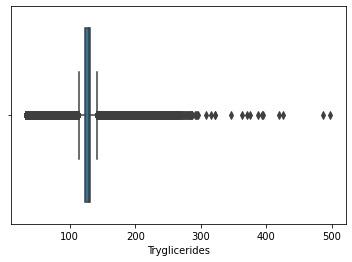

In [39]:
sns.boxplot(data['Tryglicerides'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


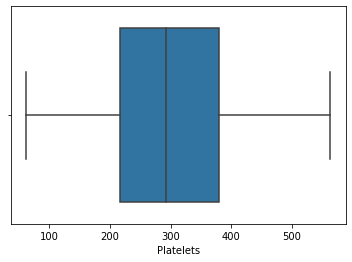

In [40]:
sns.boxplot(data['Platelets'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


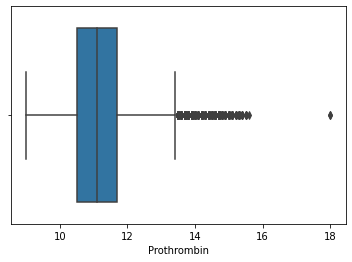

In [41]:
sns.boxplot(data['Prothrombin'])

In [42]:
data.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [43]:
data_xtrain=data[['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage']]
data_ytrain=data[['Stage']]

FEATURE SELECTION

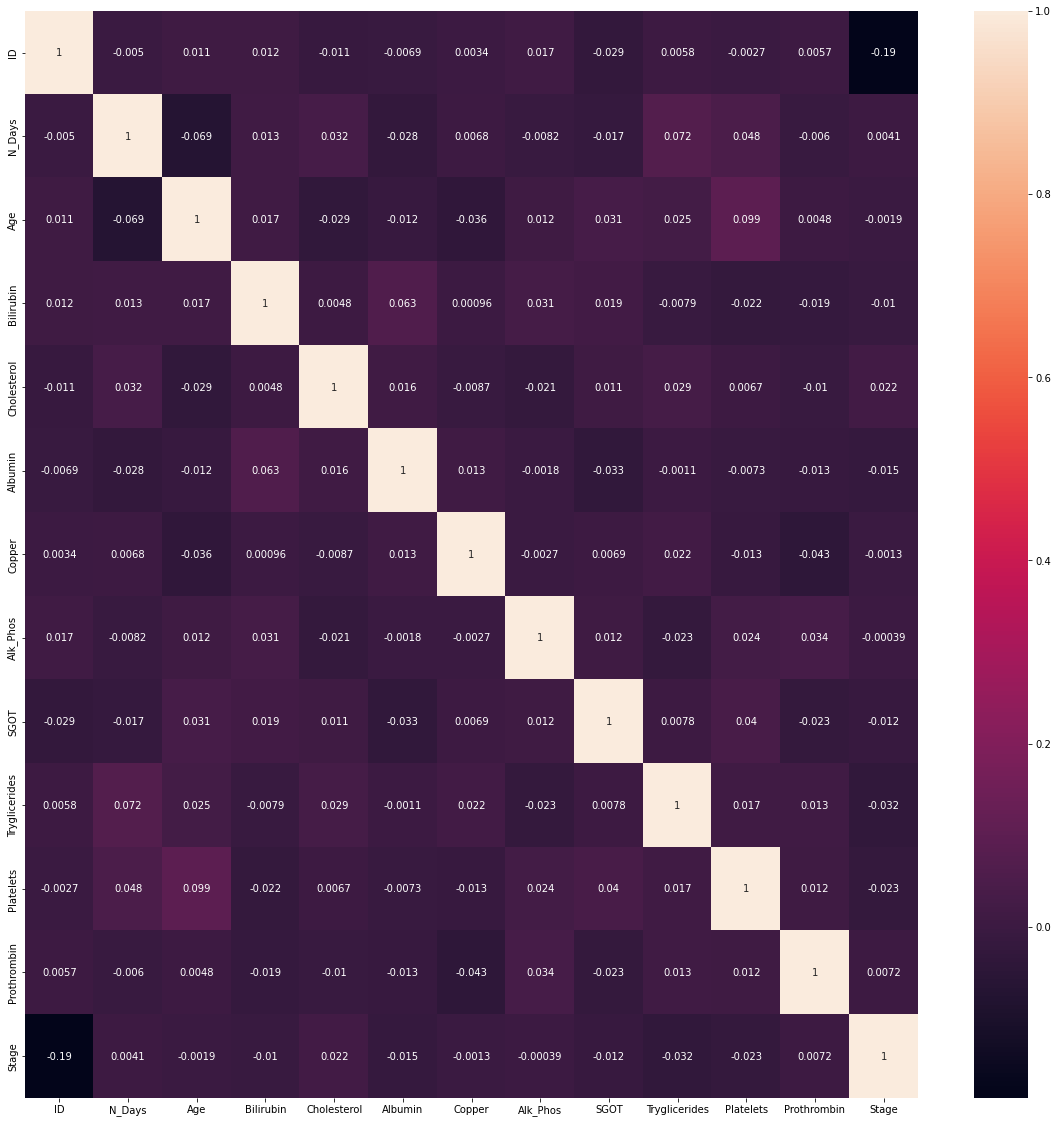

In [44]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(data_xtrain.corr(),annot=True,ax=ax)

Balance output classes

In [45]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
from imblearn.over_sampling import RandomOverSampler

In [47]:
balanced_data = RandomOverSampler(sampling_strategy='minority')

In [48]:
data_xtrain,data_ytrain = balanced_data.fit_resample(data_xtrain,data_ytrain)

In [49]:
data_ytrain.value_counts()

Stage
1.0      3506
4.0      3506
2.0      1507
3.0      1322
dtype: int64

In [50]:
data_xtrain,data_ytrain = balanced_data.fit_resample(data_xtrain,data_ytrain)

In [51]:
data_xtrain,data_ytrain = balanced_data.fit_resample(data_xtrain,data_ytrain)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


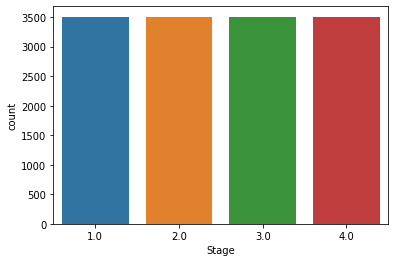

In [52]:
sns.countplot(data_ytrain['Stage'])

In [53]:
data_xtrain.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7135,1654,CL,D-penicillamine,53,F,N,N,Y,N,0.3,279.0,2.96,84.00,1500.80,99.43,109.0,293.0,10.2,4.0
1,7326,41,C,D-penicillamine,62,F,N,N,N,N,0.3,312.0,2.96,68.57,1835.40,26.35,131.0,308.0,10.8,1.0
2,7254,297,D,D-penicillamine,76,F,N,N,N,N,0.3,328.0,2.64,4.00,1563.15,88.50,116.0,194.0,10.3,3.0
3,3135,1872,C,D-penicillamine,57,F,N,Y,Y,N,0.3,302.0,2.02,49.00,1563.15,26.35,130.0,563.0,10.5,4.0
4,2483,939,CL,D-penicillamine,49,F,N,N,N,N,0.5,344.0,3.11,91.00,1563.15,104.56,130.0,306.0,11.4,2.0


In [54]:
data_xtrain["Sex"] = data_xtrain["Sex"].map({'M':1,'F':0})
data_xtrain['Ascites'] = data_xtrain['Ascites'].map({'Y':1, 'N':0})
data_xtrain['Hepatomegaly'] = data_xtrain['Hepatomegaly'].map({'Y':1, 'N':0})
data_xtrain['Spiders'] = data_xtrain['Spiders'].map({'Y':1, 'N':0})
data_xtrain['Drug'] = data_xtrain['Drug'].map({'D-penicillamine':1, 'Placebo':0})

In [55]:
data_xtrain.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7135,1654,CL,1,53,0,0,0,1,N,0.3,279.0,2.96,84.00,1500.80,99.43,109.0,293.0,10.2,4.0
1,7326,41,C,1,62,0,0,0,0,N,0.3,312.0,2.96,68.57,1835.40,26.35,131.0,308.0,10.8,1.0
2,7254,297,D,1,76,0,0,0,0,N,0.3,328.0,2.64,4.00,1563.15,88.50,116.0,194.0,10.3,3.0
3,3135,1872,C,1,57,0,0,1,1,N,0.3,302.0,2.02,49.00,1563.15,26.35,130.0,563.0,10.5,4.0
4,2483,939,CL,1,49,0,0,0,0,N,0.5,344.0,3.11,91.00,1563.15,104.56,130.0,306.0,11.4,2.0


In [56]:
data_xtrain = pd.get_dummies(data_xtrain, columns=['Status','Edema'])
data_xtrain.drop(columns=['Status_C','Edema_S','ID','Stage'],inplace=True)

In [57]:
data_xtrain.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Status_CL,Status_D,Edema_N,Edema_Y
0,1654,1,53,0,0,0,1,0.3,279.0,2.96,84.00,1500.80,99.43,109.0,293.0,10.2,1,0,1,0
1,41,1,62,0,0,0,0,0.3,312.0,2.96,68.57,1835.40,26.35,131.0,308.0,10.8,0,0,1,0
2,297,1,76,0,0,0,0,0.3,328.0,2.64,4.00,1563.15,88.50,116.0,194.0,10.3,0,1,1,0
3,1872,1,57,0,0,1,1,0.3,302.0,2.02,49.00,1563.15,26.35,130.0,563.0,10.5,0,0,1,0
4,939,1,49,0,0,0,0,0.5,344.0,3.11,91.00,1563.15,104.56,130.0,306.0,11.4,1,0,1,0


In [58]:
data_xtrain.isnull().sum()

N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Status_CL        0
Status_D         0
Edema_N          0
Edema_Y          0
dtype: int64

In [59]:
 from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = train_test_split(data_xtrain, data_ytrain, test_size=0.30, random_state=42)

MODEL BUILDING

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [61]:
knn.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [62]:
knn.score(X_test,y_test)

0.5665399239543726

In [63]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()


In [64]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [65]:
dt.score(X_test,y_test)

0.7842205323193916

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [67]:
rf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier()

In [68]:
rf.score(X_test,y_test)

0.8521863117870723

In [69]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [70]:
clf = [knn,dt,rf]
for i,model in enumerate(clf):
   y_pred=model.predict(X_test)
   print("{}:Accuracy Score ".format(clf[i]))
   print("{}".format(accuracy_score(y_test,y_pred)))
   print("{}:Classification report: ".format(clf[i]))
   print("{}".format(classification_report(y_test,y_pred)))

KNeighborsClassifier():Accuracy Score 
0.5665399239543726
KNeighborsClassifier():Classification report: 
              precision    recall  f1-score   support

         1.0       0.68      0.94      0.79      1082
         2.0       0.50      0.58      0.54      1068
         3.0       0.54      0.52      0.53      1044
         4.0       0.44      0.20      0.28      1014

    accuracy                           0.57      4208
   macro avg       0.54      0.56      0.53      4208
weighted avg       0.54      0.57      0.54      4208

DecisionTreeClassifier():Accuracy Score 
0.7842205323193916
DecisionTreeClassifier():Classification report: 
              precision    recall  f1-score   support

         1.0       0.90      1.00      0.95      1082
         2.0       0.74      0.81      0.77      1068
         3.0       0.75      0.87      0.81      1044
         4.0       0.70      0.44      0.54      1014

    accuracy                           0.78      4208
   macro avg       0.77  

Predictions for test data

In [71]:
test_data = pd.read_csv("test_dataset.csv")

In [72]:
test_data['Age'] = test_data['Age']//365

In [73]:
test_data["Cholesterol"]=test_data["Cholesterol"].fillna(test_data['Cholesterol'].median())
test_data["Copper"]=test_data["Copper"].fillna(round(test_data['Copper'].mean(),2))
test_data["Alk_Phos"]=test_data["Alk_Phos"].fillna(test_data['Alk_Phos'].median())
test_data["SGOT"]=test_data["SGOT"].fillna(round(test_data['SGOT'].median(),2))
test_data['Tryglicerides']=test_data['Tryglicerides'].fillna(test_data['Tryglicerides'].median())
test_data['Platelets']=test_data['Platelets'].fillna(test_data['Platelets'].median())
test_data['Prothrombin'] = test_data['Prothrombin'].fillna(test_data['Prothrombin'].median())

In [74]:
test_data.isnull().sum()

ID                  0
N_Days              0
Status              0
Drug              963
Age                 0
Sex                 0
Ascites          1087
Hepatomegaly     1102
Spiders          1200
Edema               0
Bilirubin           0
Cholesterol         0
Albumin             0
Copper              0
Alk_Phos            0
SGOT                0
Tryglicerides       0
Platelets           0
Prothrombin         0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


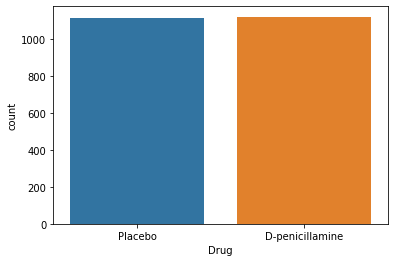

In [75]:
sns.countplot(test_data['Drug'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


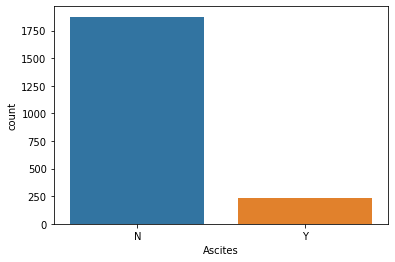

In [76]:
sns.countplot(test_data['Ascites'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


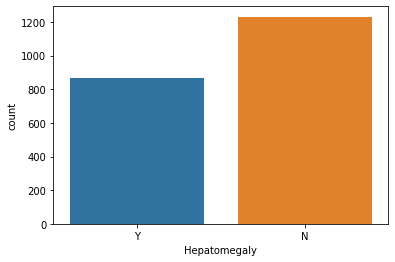

In [77]:
sns.countplot(test_data['Hepatomegaly'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


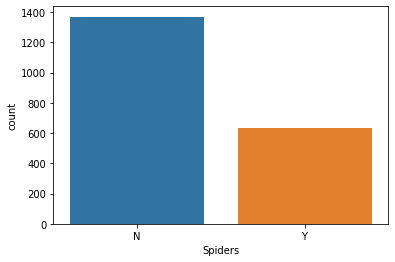

In [78]:
sns.countplot(test_data['Spiders'])

In [79]:
test_data['Drug'].value_counts()

D-penicillamine    1122
Placebo            1115
Name: Drug, dtype: int64

In [80]:
test_data["Drug"]=test_data["Drug"].fillna('D-penicillamine')
test_data["Ascites"]=test_data["Ascites"].fillna('N')
test_data["Hepatomegaly"]=test_data["Hepatomegaly"].fillna('N')
test_data["Spiders"]=test_data["Spiders"].fillna('N')

In [81]:
test_data["Sex"] = test_data["Sex"].map({'M':1,'F':0})
test_data['Ascites'] = test_data['Ascites'].map({'Y':1, 'N':0})
test_data['Hepatomegaly'] = test_data['Hepatomegaly'].map({'Y':1, 'N':0})
test_data['Spiders'] = test_data['Spiders'].map({'Y':1, 'N':0})
test_data['Drug'] = test_data['Drug'].map({'D-penicillamine':1, 'Placebo':0})

In [82]:
test_data = pd.get_dummies(test_data, columns=['Status','Edema'])
test_data.drop(columns=['Status_C','Edema_S'],inplace=True)

In [83]:
test_data.isnull().sum()

ID               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Status_CL        0
Status_D         0
Edema_N          0
Edema_Y          0
dtype: int64

We drop the patient_id to predict

In [84]:
x_test = test_data.drop(["ID"],axis =1)
id_test = test_data['ID']

In [85]:
x_test.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Status_CL,Status_D,Edema_N,Edema_Y
0,41,0,61,0,0,0,0,1.4,247.0,3.62,66.75,1551.7,108.65,127.0,169.0,11.6,0,0,1,0
1,1811,1,44,0,0,1,0,0.3,311.0,2.80,92.00,1748.1,88.77,129.0,321.0,11.5,0,0,1,0
2,954,1,74,0,0,0,0,0.4,308.0,3.56,66.75,1551.7,43.52,127.0,296.0,10.3,0,0,1,0
3,1969,0,46,0,0,1,0,1.2,308.0,3.16,66.75,617.1,113.76,127.0,125.0,10.9,0,1,1,0
4,2721,1,48,0,0,0,0,3.2,308.0,2.36,89.00,1782.4,88.77,129.0,138.0,10.6,0,1,1,0


In [86]:
data_xtrain.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Status_CL,Status_D,Edema_N,Edema_Y
0,1654,1,53,0,0,0,1,0.3,279.0,2.96,84.00,1500.80,99.43,109.0,293.0,10.2,1,0,1,0
1,41,1,62,0,0,0,0,0.3,312.0,2.96,68.57,1835.40,26.35,131.0,308.0,10.8,0,0,1,0
2,297,1,76,0,0,0,0,0.3,328.0,2.64,4.00,1563.15,88.50,116.0,194.0,10.3,0,1,1,0
3,1872,1,57,0,0,1,1,0.3,302.0,2.02,49.00,1563.15,26.35,130.0,563.0,10.5,0,0,1,0
4,939,1,49,0,0,0,0,0.5,344.0,3.11,91.00,1563.15,104.56,130.0,306.0,11.4,1,0,1,0


In [87]:
y_pred = rf.predict(x_test)

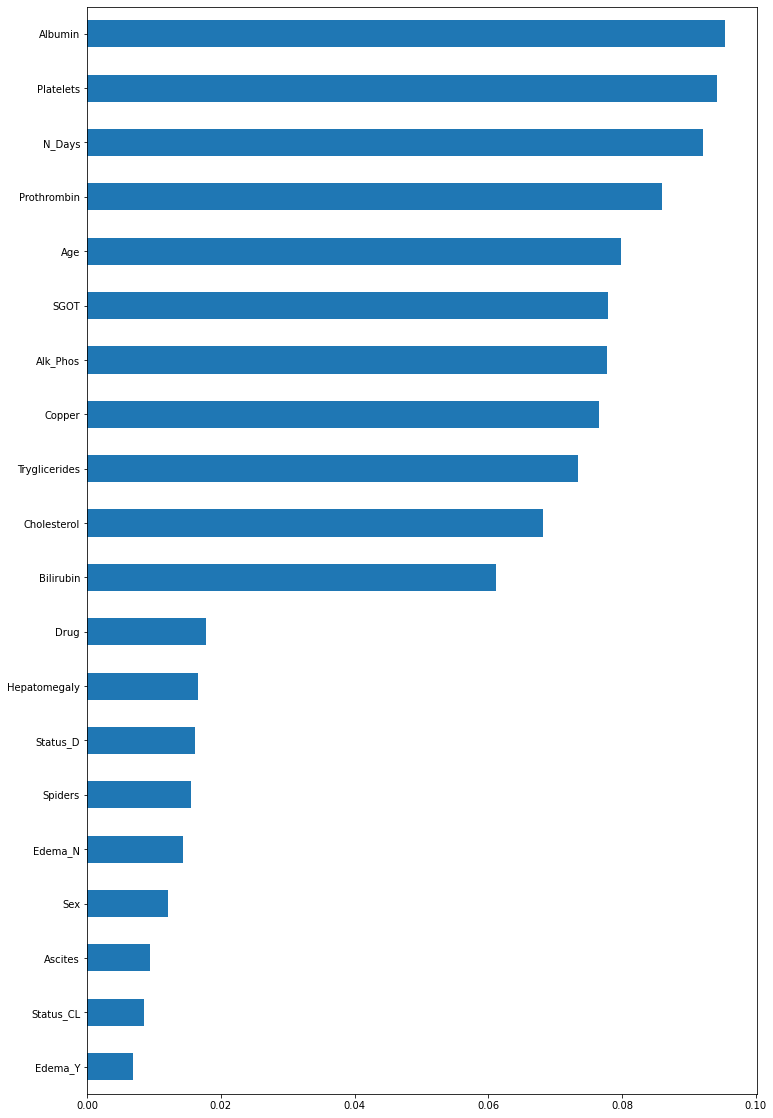

In [88]:
plt.figure(figsize = (12,20))
f_imp = pd.Series(rf.feature_importances_,index = data_xtrain.columns)
f_imp.nsmallest(20).plot(kind = 'barh')

In [89]:
y_pred_final = pd.DataFrame(id_test,columns = ['ID'])
y_pred_final["Stage"] = pd.DataFrame(y_pred,columns = ["Stage"])
y_pred_final['Stage'].value_counts()
y_pred_final.to_csv('submissions.csv',index=False)